# Chiller plant decision tree analysis

The purpose of this notebook is to analyze the features and data with decision trees.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
import glob
import os
from dataCleaning import bas_filter
%matplotlib inline

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df_plt1, key = bas_filter.data_import(
    '../../Plt1', 'Plt1 h', 
    '../../Plt1/Plt1 Points List.xlsx')

['../../Plt1\\Plt1 h 2016-11.csv', '../../Plt1\\Plt1 h 2017-01.csv', '../../Plt1\\Plt1 h 2017-03.csv', '../../Plt1\\Plt1 h 2017-05.csv', '../../Plt1\\Plt1 h 2017-07.csv', '../../Plt1\\Plt1 h 2017-09.csv']


In [4]:
bas = bas_filter.data_BAS(df_plt1, key)
bas.shape

CommunicationFailure_COV
Original data contains 8516 points and 414 dimensions.
Filtered data contains 8115 points and 66 dimensions.


(8115, 66)

In [8]:
key_alarm = key[key['Units'].str.contains("Normal/Alarm")==True]
key_alarm_BAS = key_alarm.loc[key['PointType'].str.contains("BAS")==True, 'DataPointName']
print(key_alarm_BAS)

274    CommunicationFailure
299              CTTR_ALARM
365            PCHWP3Failed
372            PCHWP4Failed
379            PCHWP5Failed
420            SCHWP3Failed
427            SCHWP4Failed
434            SCHWP5Failed
Name: DataPointName, dtype: object


In [9]:
for alm in key_alarm_BAS:
    bas = bas[bas[alm] == 0]
bas = bas[bas['OptimumControl'] == 1]

In [10]:
bas.shape

(7952, 66)

In [5]:
bas1 = bas_filter.alarm_filter(bas, key)
bas1.shape

(7952, 66)

In [13]:
#df_plt1 = pd.read_csv('../../Plt1/Plt1 h 2017-09.csv')
#df = pd.read_csv('../../Plt1/Plt1 h 2017-09.csv')
#df_plt2 = pd.read_csv('../../Plt2/Plt2 h 2017-07.csv')

In [14]:
df_plt1.dropna()

,BASMODE,CDWDT,CDWP3Failed,CDWP3HZ,CDWP3S,CDWP3SPD,CDWP3SPD_Alarm,CDWP3SS,CDWP3kW,CDWP4Failed,...,kW/Ton_InLoopFollow,kW/Ton_InLoopNotFollow,kW/Ton_OutLoop,kWh,kWh Delta,kWhSqFt,kWh_InLoopFollow,kWh_InLoopNotFollow,kWh_OutLoop,timestamp
4972,1.0,7.059722,0.0,30.000000,0.583333,49.999800,0.333333,0.583333,5.258333,0.0,...,0.548666,0.0,0.0,202.833333,140.420591,0.000862,202.833333,0.0,0.0,2017-06-06T11:00:00.000Z
4973,1.0,4.702779,0.0,50.000000,1.000000,83.333000,1.000000,1.000000,8.200000,0.0,...,0.509350,0.0,0.0,191.574999,147.253933,0.000815,191.574999,0.0,0.0,2017-06-06T12:00:00.000Z
4974,1.0,5.238891,0.0,50.000000,1.000000,83.333000,0.833333,1.000000,8.200000,0.0,...,0.518651,0.0,0.0,222.183334,174.941748,0.000945,222.183334,0.0,0.0,2017-06-06T13:00:00.000Z
4975,1.0,5.194445,0.0,50.000000,1.000000,83.333000,0.916667,1.000000,8.200000,0.0,...,0.528449,0.0,0.0,219.241667,162.004918,0.000932,219.241667,0.0,0.0,2017-06-06T14:00:00.000Z
4976,1.0,6.031944,0.0,50.000000,1.000000,83.333000,1.000000,1.000000,8.200000,0.0,...,0.504556,0.0,0.0,198.258333,157.563835,0.000843,198.258333,0.0,0.0,2017-06-06T15:00:00.000Z
4977,1.0,6.454166,0.0,50.000000,1.000000,83.333000,1.000000,1.000000,8.200000,0.0,...,0.501159,0.0,0.0,181.083335,143.992602,0.000770,181.083335,0.0,0.0,2017-06-06T16:00:00.000Z
4978,1.0,6.304166,0.0,50.000000,1.000000,83.333000,1.000000,1.000000,8.200000,0.0,...,0.515003,0.0,0.0,181.075001,133.887335,0.000770,181.075001,0.0,0.0,2017-06-06T17:00:00.000Z
4979,1.0,6.512498,0.0,50.000000,1.000000,83.333000,1.000000,1.000000,8.200000,0.0,...,0.506791,0.0,0.0,185.399999,144.003373,0.000788,185.399999,0.0,0.0,2017-06-06T18:00:00.000Z
4980,1.0,6.274998,0.0,50.000000,1.000000,83.333000,1.000000,1.000000,8.200000,0.0,...,0.494802,0.0,0.0,174.358334,145.637704,0.000741,174.358334,0.0,0.0,2017-06-06T19:00:00.000Z
4981,1.0,5.750002,0.0,50.000000,1.000000,83.333000,1.000000,1.000000,8.200000,0.0,...,0.503704,0.0,0.0,160.358334,126.371150,0.000682,160.358334,0.0,0.0,2017-06-06T20:00:00.000Z


In [15]:
key = pd.read_excel('../../Plt1/Plt1 Points List.xlsx')

In [16]:
key_bas = key.loc[key['PointType'].str.contains("BAS")==True,'DataPointName']
vals = key_bas.values.T.tolist()
vals.append('kW/Ton')
print(vals)

['CDWVLV', 'CDWVLV2', 'CHkW', 'CHWDP2', 'CHWFLO', 'CHWRT', 'CHWRT2', 'CHWRT3', 'CHWST', 'CHWST2', 'CHWST3', 'CHWV10', 'CHWV11', 'CHWV12', 'CHWV13', 'CHWV14', 'CHWV15', 'CHWV16', 'CHWV17', 'CHWV18', 'CHWV19', 'CHWV20', 'CHWV21', 'CHWV22', 'CHWV23', 'CHWV24', 'CHWV25', 'CHWV26', 'CHWV27', 'CHWV3', 'CHWV4', 'CHWV5', 'CHWV6', 'CHWV7', 'CHWV9', 'CLGMODE', 'CommunicationFailure', 'CommunicationFailure_COV', 'CTTR_ALARM', 'HX1CDWRT', 'HX1CDWST', 'HX1CDWVLV', 'HX1CHWRT', 'HX1CHWST', 'HX1CHWVLV', 'LOOPREQ', 'MaxCHDPLift', 'MaxCHDTLift', 'MinCHDPLift', 'MinCHDTLift', 'OAH', 'OAT', 'OAWB', 'PCHWP3Failed', 'PCHWP3HZ', 'PCHWP3kW', 'PCHWP3S', 'PCHWP3SPD', 'PCHWP3SS', 'PCHWP4Failed', 'PCHWP4HZ', 'PCHWP4kW', 'PCHWP4S', 'PCHWP4SPD', 'PCHWP4SS', 'PCHWP5Failed', 'PCHWP5HZ', 'PCHWP5kW', 'PCHWP5S', 'PCHWP5SPD', 'PCHWP5SS', 'SCHWP3Failed', 'SCHWP3HZ', 'SCHWP3kW', 'SCHWP3S', 'SCHWP3SPD', 'SCHWP3SS', 'SCHWP4Failed', 'SCHWP4HZ', 'SCHWP4kW', 'SCHWP4S', 'SCHWP4SPD', 'SCHWP4SS', 'SCHWP5Failed', 'SCHWP5HZ', 'SCHWP

In [17]:
for x in vals:
    if x not in df_plt1.columns:
        print(x)
        vals.remove(x)

CommunicationFailure_COV


In [18]:
#bas = df_plt1[vals].dropna()
#bas.shape

In [19]:
bas.describe()

,CDWVLV,CDWVLV2,CHkW,CHWDP2,CHWFLO,CHWRT,CHWRT2,CHWRT3,CHWST,CHWST2,...,SCHWP4SPD,SCHWP4SS,SCHWP5Failed,SCHWP5HZ,SCHWP5kW,SCHWP5S,SCHWP5SPD,SCHWP5SS,OptimumControl,kW/Ton
count,7952.0,7952.0,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,...,7952.000000,7952.0,7952.0,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.0,7952.000000
mean,1.0,1.0,90.631427,11.123248,718.494773,56.556162,54.273448,59.176313,43.068965,43.831945,...,79.415630,1.0,0.0,32.658025,1.984332,0.653431,54.429089,0.668825,1.0,0.433298
std,0.0,0.0,53.120275,2.258998,212.677987,1.144944,1.247508,1.819638,1.532754,1.617357,...,11.826422,0.0,0.0,24.295588,1.703628,0.468472,40.492131,0.463187,0.0,0.138688
min,1.0,1.0,11.666667,0.246445,115.500000,53.270833,50.500000,54.888021,39.406250,40.156250,...,44.999821,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,1.0,1.0,44.666667,10.280613,546.515625,55.786458,53.447917,57.718750,41.848958,42.500000,...,69.624721,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.319561
50%,1.0,1.0,84.041667,11.531199,665.166667,56.565104,54.218750,58.723958,42.375000,43.151042,...,76.902470,1.0,0.0,43.683333,2.000000,1.000000,72.805264,1.000000,1.0,0.427224
75%,1.0,1.0,125.833333,12.422903,991.000000,57.315104,54.947917,60.674479,44.787109,45.468750,...,88.527422,1.0,0.0,52.762499,3.375000,1.000000,87.937145,1.000000,1.0,0.525494
max,1.0,1.0,312.166667,17.265179,992.500000,66.533854,66.565104,86.744792,55.317708,56.723958,...,99.999603,1.0,0.0,60.000000,5.541667,1.000000,99.999603,1.000000,1.0,1.182704


In [20]:
n = len(bas.columns)

In [21]:
X = bas.values[:, 0:(n-2)]
Y = bas.values[:, (n-1)]

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25,
                                               random_state=3393)

In [23]:
model = DecisionTreeRegressor(
    random_state=3393, max_depth=5, 
    min_samples_leaf=7)

In [24]:
model.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=7,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3393, splitter='best')

In [25]:
y1 = model.predict(xtest)

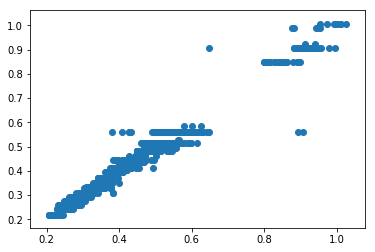

In [26]:
plt.figure()
plt.scatter(ytest, y1)

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y1))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y1))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(ytest, y1)))

Mean Absolute Error: 0.015469162820862543
Mean Squared Error: 0.0006232646290252106
Root Mean Squared Error: 0.02496526845489971


In [28]:
fanalysis = ExtraTreesRegressor(max_depth=3, 
                                random_state=3393)

In [29]:
fanalysis.fit(X, Y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=3,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=3393, verbose=0, warm_start=False)

In [30]:
print(fanalysis.feature_importances_)

[0.         0.         0.26804156 0.         0.         0.
 0.         0.         0.00383137 0.00458747 0.00497725 0.
 0.         0.         0.         0.01998883 0.         0.
 0.         0.         0.         0.17356501 0.23491304 0.02078561
 0.0131109  0.         0.11692662 0.         0.         0.00913871
 0.00054161 0.00819446 0.0120033  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00610175
 0.         0.         0.         0.10329252]


In [31]:
feats = fanalysis.feature_importances_
range(len(feats))

range(0, 64)

In [32]:
fanalysis.decision_path(X)

(<7952x150 sparse matrix of type '<class 'numpy.int64'>'
 	with 318080 stored elements in Compressed Sparse Row format>,
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150], dtype=int32))

In [33]:
fanalysis.score(X, Y)

0.9202165462960563

In [34]:
def feature_importance(X, Y, mx_depth):
    model = ExtraTreesRegressor(max_depth=mx_depth,
                                random_state=3393)
    model.fit(X, Y)
    features = model.feature_importances_
    important_features = []
    important_features_values = []
    for i in range(len(features)):
        if features[i] != 0.0:
            important_features.append(vals[i])
            important_features_values.append(features[i])
    return important_features, important_features_values

In [35]:
feature_importance(X, Y, 3)

(['CHkW',
  'CHWST',
  'CHWST2',
  'CHWST3',
  'CHWV14',
  'CHWV20',
  'CHWV21',
  'CHWV22',
  'CHWV23',
  'CHWV25',
  'CHWV3',
  'CHWV4',
  'CHWV5',
  'CHWV6',
  'PCHWP4HZ',
  'PCHWP4SS'],
 [0.2680415604328713,
  0.0038313693091662263,
  0.00458746898871287,
  0.004977246063560889,
  0.019988831226775985,
  0.17356501365180596,
  0.23491303576734648,
  0.02078561292150778,
  0.013110897293073989,
  0.11692661661891117,
  0.009138710098827253,
  0.0005416056065955691,
  0.008194455934108036,
  0.012003303510689112,
  0.006101752585238327,
  0.10329251999080906])

In [51]:
params = {'n_estimators': 2000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [52]:
clf = GradientBoostingRegressor(**params)

In [53]:
clf.fit(xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=2000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [54]:
mse = mean_squared_error(ytest, clf.predict(xtest))

In [55]:
print('MSE: %.4f' % mse)

MSE: 0.0001


In [56]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

In [57]:
for i, ypred in enumerate(clf.staged_predict(xtest)):
    test_score[i] = clf.loss_(ytest, ypred)

Text(0,0.5,'Deviance')

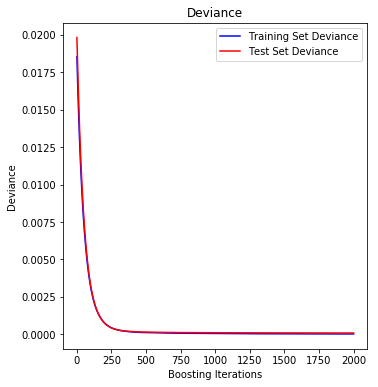

In [58]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

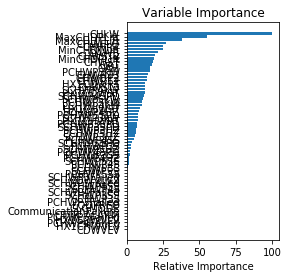

In [59]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1,2,1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, bas.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [60]:
x = bas.columns[sorted_idx]

In [61]:
print(x)

Index(['CDWVLV', 'HX1CHWVLV', 'PCHWP4Failed', 'HX1CDWVLV', 'PCHWP5Failed',
       'CTTR_ALARM', 'CommunicationFailure', 'CLGMODE', 'LOOPREQ',
       'PCHWP3Failed', 'SCHWP3S', 'SCHWP3SS', 'SCHWP4Failed', 'SCHWP4S',
       'SCHWP4SS', 'SCHWP5Failed', 'CDWVLV2', 'SCHWP3Failed', 'PCHWP5SS',
       'SCHWP5S', 'PCHWP5S', 'PCHWP4S', 'SCHWP5SS', 'PCHWP4HZ', 'PCHWP3SS',
       'PCHWP4SPD', 'SCHWP5HZ', 'PCHWP3S', 'SCHWP5SPD', 'PCHWP4SS', 'SCHWP3HZ',
       'PCHWP5HZ', 'PCHWP3HZ', 'SCHWP3SPD', 'PCHWP3SPD', 'HX1CHWRT',
       'SCHWP3kW', 'PCHWP5SPD', 'SCHWP4HZ', 'HX1CHWST', 'PCHWP4kW', 'PCHWP5kW',
       'SCHWP5kW', 'SCHWP4SPD', 'HX1CDWST', 'SCHWP4kW', 'CHWST3', 'HX1CDWRT',
       'CHWRT2', 'CHWDP2', 'CHWRT3', 'PCHWP3kW', 'OAH', 'OAT', 'CHWST',
       'MinCHDPLift', 'CHWST2', 'OAWB', 'MinCHDTLift', 'CHWRT', 'CHWFLO',
       'MaxCHDTLift', 'MaxCHDPLift', 'CHkW'],
      dtype='object')


In [62]:
print(sorted_idx)

[ 0 19 34 16 40 13 12 11 20 28 49 51 52 55 57 58  1 46 45 61 43 37 63 35
 33 38 59 31 62 39 47 41 29 50 32 17 48 44 53 18 36 42 60 56 15 54 10 14
  6  3  7 30 25 26  8 23  9 27 24  5  4 22 21  2]


In [63]:
print(feature_importance[sorted_idx])
imp = feature_importance[sorted_idx]

[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.25583882   0.26051027
   0.47845732   1.29675444   1.71414009   1.72554217   1.76367065
   2.39396044   2.70522767   2.75549564   3.82481196   5.11745944
   5.24188532   5.97356998   6.56946102   6.63090876   7.23195711
   7.60741451   7.77213695   7.87532847   8.64620098   8.6705317
  10.14042265  10.28377378  11.20340991  11.91384709  12.44748171
  12.46337785  12.6270244   12.66532726  13.78205656  14.04301049
  14.20676891  15.78987788  15.9848659   17.01875615  17.68164571
  18.68779598  19.15764257  21.29985141  24.53154339  24.54905496
  26.69322427  38.07210225  55.4505933  100.        ]


In [64]:
df_plt1_feats = pd.DataFrame({'feature_name': x, 'feat_import': imp})

In [65]:
df_plt1_feats

,feat_import,feature_name
0,0.000000,CDWVLV
1,0.000000,HX1CHWVLV
2,0.000000,PCHWP4Failed
3,0.000000,HX1CDWVLV
4,0.000000,PCHWP5Failed
5,0.000000,CTTR_ALARM
6,0.000000,CommunicationFailure
7,0.000000,CLGMODE
8,0.000000,LOOPREQ
9,0.000000,PCHWP3Failed
